# Importation of the dataset



In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

In [2]:
if IN_COLAB:
  from google.colab import drive

  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls 'drive/My Drive'

 Assignments3.ipynb  'Colab Notebooks'	 donut.png   SentiMix.txt


# Case Study: Sentiment Analysis

First stage of our competition. 

The work to be done is as follows:
1. Feature extraction and baseline
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
    * <span style="color:red">You have to send me your notebook</span>
1. My first neural network
    * reuse the features already extracted 
    * proposed a neural network built with Keras
    * <span style="color:red">You have to send me your notebook</span>
<span style="color:red">
1. <span style="color:red">Hyper-parameter fitting
    * for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
    * for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop
    </span>
1. <span style="color:red">Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 2 build a network that simultaneously uses Keras' embedding and the features extracted in the first weeks.
    </span>
1. Recurrent neural network<span style="color:red">
    * stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state 
    * stage 2: build a network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    * stage 3: build a bi-directional network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    </span>
1. k-NN, Naive-Bayes and Decision Tree<span style="color:red">
 </span>
 







**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.

# First approach: Read the dataset, normalize and extract



In [0]:
import numpy as np
import pandas as pd

In [5]:
if IN_COLAB:
  pwd = "drive/My Drive/SentiMix.txt"
else:
  pwd = "C:\\Users\\rapho\\OneDrive\\Bureau\\MSc DATA SCIENCE\\machine learning\\SentiMix.txt"
txt = pd.read_csv(pwd,  encoding="utf8")
txt

meta\t3\tnegative
0                     @\tO
1       AdilNisarButt\tHin
2            pakistan\tHin
3                  ka\tHin
4                ghra\tHin
...                    ...
367338           kuch\tHin
367339            bhi\tHin
367340           nahi\tHin
367341        karenge\tHin
367342                .\tO

[367343 rows x 1 columns]

## 1. Read the dataset

Could you find below a proposal. You can complete them.

In [6]:
# to read the data
def read(file,nb_lines=0):
    with open(file,'r', encoding="utf8")as f:
        for i, line in enumerate(f.readlines()):
            print(line,end=" ")
            if i>nb_lines:
                return
df=read(pwd,10)

meta	3	negative
 @	O
 AdilNisarButt	Hin
 pakistan	Hin
 ka	Hin
 ghra	Hin
 tauq	Hin
 he	Eng
 Pakistan	Eng
 Israel	Eng
 ko	Eng
 tasleem	Hin
 

In [0]:
# changing the data to dataframe

import pandas as pd
import numpy as np

def read(file,nb_lines=0):
    with open(file,'r',encoding="utf8")as f:
        df=pd.DataFrame({'id':[],
                        'review':[],
                        'lang':[],
                        'sentiment':[]})
        
        id = []
        for line in f.readlines():
            tokens = line.strip().split('\t')
            if tokens[0]=='meta':
                if id!=[]:
                    df.loc[len(df)]=[id,
                                    review,
                                    lang,
                                    sentiment]
                    if nb_lines!=0 and len(df)==nb_lines:
                        
                        return df
                id=tokens[1]
                sentiment=tokens[2]
                review=[]
                lang=[]
            elif tokens[0]!="":
                if len(tokens)==2:
                    review +=[tokens[0]]
                    lang +=[tokens[1]]
                        
        return df 
    read(path+"train_conll.txt", 2).head()       

In [0]:
df=read(pwd,10)
df

id  ... sentiment
0    3  ...  negative
1   41  ...  negative
2   48  ...  positive
3   64  ...  positive
4   66  ...  positive
5   68  ...  negative
6   90  ...  positive
7   99  ...  negative
8  101  ...  positive
9  104  ...  negative

[10 rows x 4 columns]

In [0]:
from sklearn.model_selection import train_test_split

''' Define X_train and X_valid '''

df_train = read(pwd, 2000)
df_train, df_valid = train_test_split(df_train, test_size=0.3)

In [9]:
X_train = df_train['review']
y_train = df_train['sentiment']

''' Define X_valid and y_valid '''
X_valid = df_valid['review']
y_valid = df_valid['sentiment']

X_valid.shape, y_valid.shape

((600,), (600,))

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_valid_enc = encoder.transform(y_valid)

nb_classes = len(np.unique(y_train_enc))
nb_classes

3

In [11]:
np.unique(y_train_enc)

array([0, 1, 2])

## 2. Text normalisation




In [12]:
#remove upper case
X_train1 = [[t.lower() for t in i]for i in X_train]
print(X_train1)
X_valid1 = [[t.lower() for t in i]for i in X_valid]
print(X_valid1)

[['rt', '@', 'oldschoolmonk', 'ye', 'hd', 'kumaraswamy', 'hamesha', 'aisi', 'shakal', 'kyon', 'bana', 'ke', 'rakhta', 'hai', 'jaise', 'kayi', 'din', 'se', 'tatti', 'nahi', 'aayi', '.', 'kabhi', 'bangalore', 'mein', 'di', '…'], ['rt', '@__', 'moeshaaa', '__', 'a', 'week', 'ago', 'we', 'didn', '’', 't', 'win', 'the', 'championship', 'but', 'we', 'came', 'in', '5th', 'overall', 'and', 'got', 'all', 'american', 'ohhhh', 'and', 'don', '’', 't', 'forget', 'we', 'made', '…'], ['@', 'desistupides', '@', 'amitshah', '@', 'manakgupta', '@', 'narendramodi', 'yeh', 'desh', 'mein', 'tadi', 'par', 'bhi', 'home', 'minister', 'banta', 'hai', '....', 'aur', 'ek', 'pm', '…', 'https', '//', 't', '.', 'co', '/', 'xqk63hys0r'], ['@', 'kamaalrkhan', 'abe', 'tu', 'apni', 'movie', 'bhi', 'yed', 'kr', 'le', 'thori', 'bhul', 'gaya', 'ho', 'to', 'ghatiya', 'aadmi', 'us', 'movie', 'ko', 'to', 'poster', 'pe', 'he', 'thuk', 'diya', 'tha', 'audience', 'ne', '😂😂😂😂😂'], ['the', 'nep', 'is', 'an', 'unmitigated', 'disast

In [0]:
listetoremove=['"','.',';','🤗','😂😂', '@','❤', '//','😂😂😂😂', '😂', '&', '👌♥🔥', '💓💓💓', '...♥♥', '+', '-', '#', '(((', 
               '...', '?', '!',"$", '*', '/', '❤😘', '😍😘☺❤💓', '😜', '🥺', '👍🏻', '🤣🤣🤣🤣🤣', '😒', '🙏', '❤️❤️', '??😹😹', '🤣🤣', '😠😠']
               #pourtant les emoticones sont définies par EMT et ne devrait logiquement pas être dans notre liste de mot anglais

In [14]:
#remove all the punctuation and the smileys
for i in range(2):
  for j in range(10):
    if X_train1[i][j] in listetoremove:
      del X_train1[i][j]
print(X_train1)

[['rt', 'oldschoolmonk', 'ye', 'hd', 'kumaraswamy', 'hamesha', 'aisi', 'shakal', 'kyon', 'bana', 'ke', 'rakhta', 'hai', 'jaise', 'kayi', 'din', 'se', 'tatti', 'nahi', 'aayi', '.', 'kabhi', 'bangalore', 'mein', 'di', '…'], ['rt', '@__', 'moeshaaa', '__', 'a', 'week', 'ago', 'we', 'didn', '’', 't', 'win', 'the', 'championship', 'but', 'we', 'came', 'in', '5th', 'overall', 'and', 'got', 'all', 'american', 'ohhhh', 'and', 'don', '’', 't', 'forget', 'we', 'made', '…'], ['@', 'desistupides', '@', 'amitshah', '@', 'manakgupta', '@', 'narendramodi', 'yeh', 'desh', 'mein', 'tadi', 'par', 'bhi', 'home', 'minister', 'banta', 'hai', '....', 'aur', 'ek', 'pm', '…', 'https', '//', 't', '.', 'co', '/', 'xqk63hys0r'], ['@', 'kamaalrkhan', 'abe', 'tu', 'apni', 'movie', 'bhi', 'yed', 'kr', 'le', 'thori', 'bhul', 'gaya', 'ho', 'to', 'ghatiya', 'aadmi', 'us', 'movie', 'ko', 'to', 'poster', 'pe', 'he', 'thuk', 'diya', 'tha', 'audience', 'ne', '😂😂😂😂😂'], ['the', 'nep', 'is', 'an', 'unmitigated', 'disaster', 

In [15]:
for i in range(2):
  for j in range(10):
    if X_valid1[i][j] in listetoremove:
      del X_valid1[i][j]
print(X_valid1)

[['rt', 'nidhiyogi', 'it', 'took', 'just', 'a', 'few', 'months', 'for', 'kamal', 'nath', 'to', 'show', 'his', 'true', 'colours', '!', 'what', 'is', '@', 'rahulgandhi', 'saying', 'on', 'this', '?', 'a', 'corruption', 'case', 'of', '…'], ['ammi', 'jaan', 'kehti', 'thi', 'aur', 'shah', 'rukh', 'khan', 'kehte', 'hain', '🙌🏻', 'extremely', 'humbled', 'and', 'overjoyed', '.', 'i', 'love', 'you', 'sir', '❤️❤️❤️', '@', 'iamsrk', 'https', '//', 't', '.', 'co', '/', 'f5liblt3qh'], ['rt', '@', 'ravipat96925518', '@', 'drharshvardhan', 'ji', 'pranam', 'sir', '.....', 'ayush', 'homoeopathy', 'doctors', 'ki', 'jagah', 'govt', 'bsc', 'gnm', 'nursing', 'ko', 'community', 'health', 'officer', '…'], ['@', 'shilpisinghinc', 'ye', 'madam', 'ki', 'glti', 'ni', 'h', 'wo', 'kya', 'h', 'ki', 'naam', 'ke', 'piche', 'jo', 'inc', 'lga', 'hua', 'h', 'n', 'ji', 'wo', 'hi', 'motivate', 'krwa', 'deta', 'h', '…', 'https', '//', 't', 'co', '/', 'e126e6ietz'], ['rt', '@', 'chiranjitbasak3', '@', 'rrbkolkata', 'dear', 's

In [0]:
#remove all the punctuation and the smileys
for i in range(len(X_train1)):
  for j in range(len(X_train1[i])):
    if X_train1[i][len(X_train1[i])-j-1] in listetoremove:
      del X_train1[i][len(X_train1[i])-j-1]


for i in range(len(X_valid1)):
  for j in range(len(X_valid1[i])):
    if X_valid1[i][len(X_valid1[i])-j-1] in listetoremove:
      del X_valid1[i][len(X_valid1[i])-j-1]

In [17]:
# Stop words removal in NLTK:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#nltk.download() # download nltk packages

stop = stopwords.words('english')

#stop words removal
  
filtered_sent=[[word for word in a if not word in stop] for a in X_train1]
filtered_valid=[[word for word in a if not word in stop] for a in X_valid1]

print("Tokenized Sentence:",len(X_train1), X_train1)
print("Filtered Sentence:",len(filtered_sent), filtered_sent)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tokenized Sentence: 1400 [['rt', 'oldschoolmonk', 'ye', 'hd', 'kumaraswamy', 'hamesha', 'aisi', 'shakal', 'kyon', 'bana', 'ke', 'rakhta', 'hai', 'jaise', 'kayi', 'din', 'se', 'tatti', 'nahi', 'aayi', 'kabhi', 'bangalore', 'mein', 'di', '…'], ['rt', '@__', 'moeshaaa', '__', 'a', 'week', 'ago', 'we', 'didn', '’', 't', 'win', 'the', 'championship', 'but', 'we', 'came', 'in', '5th', 'overall', 'and', 'got', 'all', 'american', 'ohhhh', 'and', 'don', '’', 't', 'forget', 'we', 'made', '…'], ['desistupides', 'amitshah', 'manakgupta', 'narendramodi', 'yeh', 'desh', 'mein', 'tadi', 'par', 'bhi', 'home', 'minister', 'banta', 'hai', '....', 'aur', 'ek', 'pm', '…', 'https', 't', 'co', 'xqk63hys0r'], ['kamaalrkhan', 'abe', 'tu', 'apni', 'movie', 'bhi', 'yed', 'kr', 'le', 'thori', 'bhul', 'gaya', 'ho', 'to', 'ghatiya', 'aadmi', 'us', 'movie', 'ko', 'to', 'poster', 'pe', 'he', 'thuk', 'diya',

## 3. Feature extraction

Could you find below a proposal. You can complete them.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)

X_train_enc = cv.fit_transform(X_train.apply(' '.join)).toarray()
print(X_train_enc.shape)
X_valid_enc = cv.transform(X_valid.apply(' '.join)).toarray()
print(X_valid_enc.shape)

(1400, 9311)
(600, 9311)


In [19]:
X_train_nor= [' '.join(s) for s in filtered_sent]
print(len(X_train_nor))
X_train_nor[:5]
X_valid_nor= [' '.join(s) for s in filtered_valid]
print(len(X_valid_nor))

1400
600


In [20]:
X_train_enc_nor= cv.fit_transform(X_train_nor)
print(X_train_enc_nor.shape)
X_valid_enc_nor = cv.transform(X_valid.apply(' '.join)).toarray()
print(X_valid_enc_nor.shape)

(1400, 9201)
(600, 9201)


# Week 3: Logistic Regression





In [0]:
from sklearn.linear_model import LogisticRegression
from joblib import dump

model = LogisticRegression(multi_class='auto')
model.fit(X_train_enc, y_train)
dump(model, 'LogisticRegression.joblib');

In [0]:
model_nor = LogisticRegression(multi_class='auto')
model_nor.fit(X_train_enc_nor, y_train)
dump(model, 'LogisticRegression.joblib');

Evaluate


In [0]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

model1 = load('LogisticRegression.joblib')
y_pred = model.predict(X_valid_enc)
y_pred_nor=model_nor.predict(X_valid_enc_nor)

print("The result for the original dataset is:")
precision, recall, fscore, support = precision_recall_fscore_support(y_valid, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

print("The result for the normalized dataset is:")
precision, recall, fscore, support = precision_recall_fscore_support(y_valid, y_pred_nor, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

The result for the original dataset is:
* P: 0.5748969907407407
* R: 0.5633333333333334
* F: 0.5662126494403863
The result for the normalized dataset is:
* P: 0.5596026883470102
* R: 0.5483333333333333
* F: 0.5503136869246881


 ## <span style="color:red">Build your own keras model<span>

 

In [0]:
#import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras import utils

In [0]:
# This returns a tensor
inputs = Input(shape=(X_train_enc.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(32, activation='relu')(inputs)
output_2 = Dense(16, activation='sigmoid')(output_1)
predictions = Dense(3, activation='softmax')(output_2) #3 is the number of classes

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [0]:
utils.print_summary(model)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9246)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9247      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 9,251
Trainable params: 9,251
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [0]:
history = model.fit(X_train_enc, y_train_enc, epochs=100, validation_data=[X_valid_enc, y_valid_enc])
model.save("keras_mlp.h5")




Train on 1400 samples, validate on 600 samples
Epoch 1/100





1400/1400 [==============================] - 9s 7ms/step - loss: 0.7294 - mean_absolute_error: 0.7055 - val_loss: 0.6008 - val_mean_absolute_error: 0.6501
Epoch 2/100
1400/1400 [==============================] - 0s 143us/step - loss: 0.5557 - mean_absolute_error: 0.6062 - val_loss: 0.5674 - val_mean_absolute_error: 0.6256
Epoch 3/100
1400/1400 [==============================] - 0s 144us/step - loss: 0.5145 - mean_absolute_error: 0.5870 - val_loss: 0.5341 - val_mean_absolute_error: 0.6130
Epoch 4/100
1400/1400 [==============================] - 0s 158us/step - loss: 0.4784 - mean_absolute_error: 0.5732 - val_loss: 0.5165 - val_mean_absolute_error: 0.6100
Epoch 5/100
1400/1400 [==============================] - 0s 138us/step - loss: 0.4496 - mean_absolute_error: 0.5608 - val_loss: 0.4937 - val_mean_absolute_error: 0.5929
Epoch 6/100
1400/1400 [==============================] - 0s 144us/step - loss: 0.4246 - mean_absolute_

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


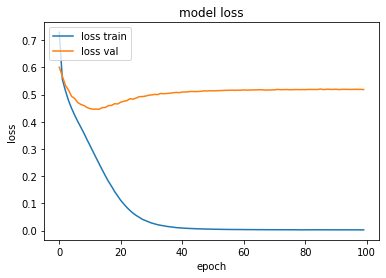

In [0]:
# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

In [0]:
model.metrics_names

['loss', 'mean_absolute_error']

In [0]:
model.evaluate(X_valid_enc, y_valid_enc)

600/600 [==============================] - 0s 84us/step


[0.5187450524171193, 0.5759798638025919]

In [0]:
#evaluation
from keras.models import load_model

# load model
model1 = load_model('model.h5') #to change
y_pred_enc = model1.predict(X_valid_enc)
y_pred = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

Third Week: Hyper-parameter fitting
- for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
- for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv3=CountVectorizer(stop_words='english',binary=False, max_df=0.80,min_df=0.20, max_features=200,
                  ngram_range=(1,1))
cv3

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=200, min_df=0.2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Early stop


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Sequential, load_model
from matplotlib import pyplot

# Change patience from 1 to 200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

mc= ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# define model
model = load_model("keras_mlp.h5")
#model.add(Dense(500, input_dim=2, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train_enc,y_train_enc, validation_data=(X_valid_enc,y_valid_enc), epochs=4000, verbose=0, callbacks=[es, mc])

model.save("best_model.h5")

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, test_acc = saved_model.evaluate(X_valid_enc, y_valid_enc, verbose=0)
test_acc


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00202: early stopping


0.4983333341280619

In [0]:
X_train_enc = cv3.fit_transform(X_train.apply(' '.join)).toarray()
X_valid_enc = cv3.transform(X_valid.apply(' '.join)).toarray()

In [0]:
# This returns a tensor
inputs = Input(shape=(X_train_enc.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(64, activation="relu")(inputs) #4 neurons and 4 layers
output_2 = Dense(32, activation="relu")(output_1)
output_3=Dense(32, activation="relu")(output_2)
output_4=Dense(16, activation="sigmoid")(output_3)
predictions = Dense(3, activation='softmax')(output_4)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# using earlystop and modelcheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#increasing the number of epoches and adda batch_size
history = model.fit(X_train_enc, y_train_enc, epochs=300,batch_size=128, validation_data=[X_valid_enc, y_valid_enc],callbacks=[es,mc])
model.save("model_1")



Train on 1400 samples, validate on 600 samples
Epoch 1/300
1400/1400 [==============================] - 0s 334us/step - loss: 4.0657 - acc: 0.3414 - val_loss: 3.7279 - val_acc: 0.3117
Epoch 2/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.3043 - acc: 0.2886 - val_loss: 3.4508 - val_acc: 0.3133
Epoch 3/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.0126 - acc: 0.3043 - val_loss: 3.2933 - val_acc: 0.2633
Epoch 4/300
1400/1400 [==============================] - 0s 32us/step - loss: 3.1236 - acc: 0.2700 - val_loss: 3.5955 - val_acc: 0.2633
Epoch 5/300
1400/1400 [==============================] - 0s 34us/step - loss: 3.1826 - acc: 0.2707 - val_loss: 3.3885 - val_acc: 0.2650
Epoch 6/300
 128/1400 [=>............................] - ETA: 0s - loss: 3.0807 - acc: 0.2188

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 34us/step - loss: 3.0542 - acc: 0.3057 - val_loss: 3.3282 - val_acc: 0.3100
Epoch 7/300
1400/1400 [==============================] - 0s 34us/step - loss: 2.9802 - acc: 0.3321 - val_loss: 3.2049 - val_acc: 0.3100
Epoch 8/300
1400/1400 [==============================] - 0s 49us/step - loss: 2.2528 - acc: 0.3171 - val_loss: 1.4166 - val_acc: 0.3067
Epoch 9/300
1400/1400 [==============================] - 0s 38us/step - loss: 1.3856 - acc: 0.3336 - val_loss: 1.3845 - val_acc: 0.3067
Epoch 10/300
1400/1400 [==============================] - 0s 33us/step - loss: 1.3923 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 11/300
1400/1400 [==============================] - 0s 38us/step - loss: 1.3863 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 12/300
1400/1400 [==============================] - 0s 41us/step - loss: 1.3863 - acc: 0.3336 - val_loss: 1.3840 - val_acc: 0.3067
Epoch 13/300
1400/1400 [==============================] -

In [0]:
# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
from keras.models import load_model

# load model
model1 = load_model('model.h5')
y_pred_enc = model1.predict(X_valid_enc)
y_pred = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

# Week 4: Word embedding with Keras





In [24]:
from keras.preprocessing.text import Tokenizer

FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 4_000 # Max size of the vocabulary in review

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train1)

# encode documents
X_train_enc2 = tokenizer.texts_to_sequences(X_train1) #each work is going to be a sequence
X_valid_enc2 = tokenizer.texts_to_sequences(X_valid)


Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 24     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc2 = pad_sequences(X_train_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_valid_enc2 = pad_sequences(X_valid_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

Build neural network


In [26]:
import keras
from keras.models import Model
from keras.layers import Input, Dropout, Dense, Embedding, Flatten, LSTM
from keras import utils

EMBEDDING_SIZE = 50

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

flatten = Flatten()(embedding) 

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu')(flatten)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(nb_classes, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

utils.print_summary(model)






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 24, 50)            200000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                19216     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 219,379
Trainable params: 219,379
Non-trainable params: 0
________________________________________________

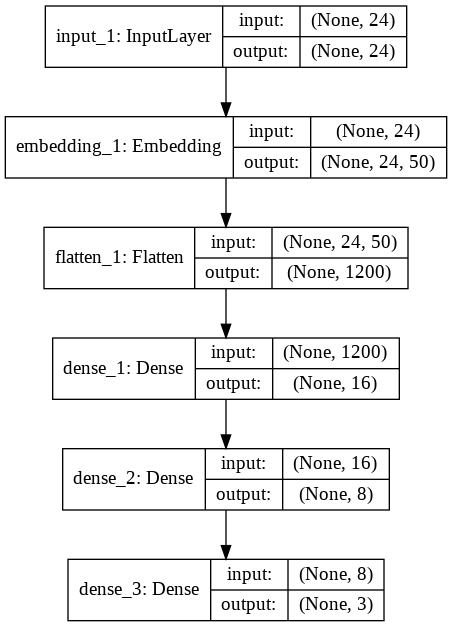

In [27]:
from IPython.display import Image
from keras.utils import plot_model


plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')
Image(retina=False, filename='model2.png')

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1400 samples, validate on 600 samples
Epoch 1/500





1400/1400 [==============================] - 9s 7ms/step - loss: 1.0900 - acc: 0.3821 - val_loss: 1.0845 - val_acc: 0.3717
Epoch 2/500
1400/1400 [==============================] - 0s 120us/step - loss: 1.0409 - acc: 0.4493 - val_loss: 1.0795 - val_acc: 0.3833
Epoch 3/500
  32/1400 [..............................] - ETA: 0s - loss: 0.9745 - acc: 0.7188

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 0s 119us/step - loss: 0.8834 - acc: 0.7386 - val_loss: 1.0611 - val_acc: 0.4267
Epoch 4/500
1400/1400 [==============================] - 0s 115us/step - loss: 0.4815 - acc: 0.9307 - val_loss: 1.0593 - val_acc: 0.4600
Epoch 5/500
1400/1400 [==============================] - 0s 111us/step - loss: 0.1512 - acc: 0.9836 - val_loss: 1.0880 - val_acc: 0.4783
Epoch 6/500
1400/1400 [==============================] - 0s 121us/step - loss: 0.0489 - acc: 0.9957 - val_loss: 1.1594 - val_acc: 0.4733
Epoch 7/500
1400/1400 [==============================] - 0s 109us/step - loss: 0.0234 - acc: 0.9986 - val_loss: 1.1982 - val_acc: 0.4667
Epoch 8/500
1400/1400 [==============================] - 0s 122us/step - loss: 0.0160 - acc: 0.9979 - val_loss: 1.2388 - val_acc: 0.4733
Epoch 9/500
1400/1400 [==============================] - 0s 112us/step - loss: 0.0104 - acc: 0.9986 - val_loss: 1.2519 - val_acc: 0.4717
Epoch 10/500
1400/1400 [=============================

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Evaluate



In [0]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h5')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

==================== validation set
* P: 0.4860420662973899
* R: 0.45
* F: 0.4402444712876603


## Network that simultaneously uses Keras' embedding and the features previously extracted 



In [0]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input
from keras.layers.merge import Dot

In [0]:
# inputs
w_inputs = Input(shape=(X_train_enc.shape[1],))
w = flatten

# context
c_inputs = Input(shape=(X_train_enc.shape[1],))
c  = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=9248)(c_inputs)
#print(c.shape)
#o = Dot(axes=2)([w, c])
#o = Reshape((1,), input_shape=(1, 1))(o)
#o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=c)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 9248)              0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 9248, 50)          200000    
Total params: 200,000
Trainable params: 200,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('model_6', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h6")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 0s 106us/step - loss: 0.4261 - accuracy: 0.8900 - val_loss: 1.1545 - val_accuracy: 0.4750

Epoch 00001: val_accuracy improved from -inf to 0.47500, saving model to model_6
Epoch 2/500
1400/1400 [==============================] - 0s 90us/step - loss: 0.4180 - accuracy: 0.8957 - val_loss: 1.1632 - val_accuracy: 0.4750

Epoch 00002: val_accuracy did not improve from 0.47500
Epoch 3/500
1400/1400 [==============================] - 0s 105us/step - loss: 0.4094 - accuracy: 0.8993 - val_loss: 1.1761 - val_accuracy: 0.4717

Epoch 00003: val_accuracy did not improve from 0.47500
Epoch 4/500
1400/1400 [==============================] - 0s 106us/step - loss: 0.4013 - accuracy: 0.9021 - val_loss: 1.1800 - val_accuracy: 0.4700

Epoch 00004: val_accuracy did not improve from 0.47500
Epoch 5/500
1400/1400 [==============================] - 0s 108us/step - loss: 0.3935 - accuracy: 0.9071 - val_loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


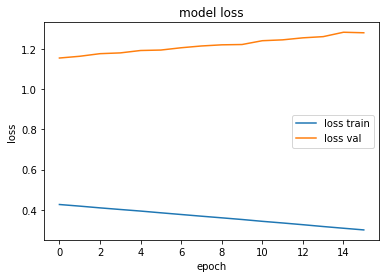

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h6')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

==================== validation set
* P: 0.46103548656001464
* R: 0.455
* F: 0.4544243238220204


# Week 5: Recurrent neural network


stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state
stage 2: The classification will be done on the mean of all hidden state 
stage 3: build a bi-directional network that uses recurrent neurons. The classification will be done on the mean of all hidden state


In [29]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, LSTM, Average, AveragePooling1D
from keras import utils

EMBEDDING_SIZE = 50

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

# a layer instance is callable on a tensor, and returns a tensor
output_1 = LSTM(16, return_sequences=False, activation='relu')(embedding)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(nb_classes, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

utils.print_summary(model)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 24, 50)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                4288      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 204,451
Trainable params: 204,451
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h5")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 3s 2ms/step - loss: 1.0868 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 2/500
 160/1400 [==>...........................] - ETA: 1s - loss: 1.0963 - acc: 0.3750

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 2s 1ms/step - loss: 1.0867 - acc: 0.3914 - val_loss: 1.0897 - val_acc: 0.3717
Epoch 3/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0867 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 4/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0867 - acc: 0.3914 - val_loss: 1.0897 - val_acc: 0.3717
Epoch 5/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0867 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 6/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0866 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 7/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0866 - acc: 0.3914 - val_loss: 1.0897 - val_acc: 0.3717
Epoch 8/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0866 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 9/500
1400/1400 [==============================] - 2s 1ms/ste

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


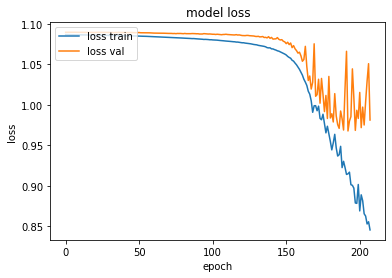

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

In [35]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h5')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

==================== validation set
* P: 0.5100797448165869
* R: 0.47833333333333333
* F: 0.46071509441510244


In [0]:
import tensorflow

In [0]:
# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

In [37]:
# a layer instance is callable on a tensor, and returns a tensor
output_1 = LSTM(16, return_sequences=True, activation='relu')(embedding)
output_2= AveragePooling1D(1)(output_1) #to have the mean of all hidden layers
output_2=Flatten()(output_2)
output_3 = Dense(8, activation='relu')(output_2)
predictions = Dense(nb_classes, activation='softmax')(output_3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

utils.print_summary(model)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 24, 50)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 16)            4288      
_________________________________________________________________
average_pooling1d_1 (Average (None, 24, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 3080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27 

In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h6', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h6")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 7s 5ms/step - loss: 1.0966 - acc: 0.3893 - val_loss: 1.0951 - val_acc: 0.3717
Epoch 2/500
 160/1400 [==>...........................] - ETA: 1s - loss: 1.0961 - acc: 0.3875

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 2s 1ms/step - loss: 1.0937 - acc: 0.3914 - val_loss: 1.0928 - val_acc: 0.3717
Epoch 3/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0915 - acc: 0.3914 - val_loss: 1.0912 - val_acc: 0.3717
Epoch 4/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0901 - acc: 0.3914 - val_loss: 1.0903 - val_acc: 0.3717
Epoch 5/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0891 - acc: 0.3914 - val_loss: 1.0896 - val_acc: 0.3717
Epoch 6/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0885 - acc: 0.3914 - val_loss: 1.0893 - val_acc: 0.3717
Epoch 7/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0881 - acc: 0.3914 - val_loss: 1.0891 - val_acc: 0.3717
Epoch 8/500
1400/1400 [==============================] - 2s 1ms/step - loss: 1.0879 - acc: 0.3914 - val_loss: 1.0890 - val_acc: 0.3717
Epoch 9/500
1400/1400 [==============================] - 2s 1ms/ste

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [41]:
from keras.models import load_model

# load model
model1 = load_model('model.h6')
y_pred_enc = model1.predict(X_valid_enc2)
y_pred = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 0.4513228021978023
* R: 0.445
* F: 0.37114154829454393


In [0]:
from keras.layers import Bidirectional

In [43]:
# a layer instance is callable on a tensor, and returns a tensor
output_1 = Bidirectional(LSTM(16, return_sequences=True, activation='relu'))(embedding)
output_2= AveragePooling1D(1)(output_1)
output_2=Flatten()(output_2)
output_3 = Dense(8, activation='relu')(output_2)
predictions = Dense(nb_classes, activation='softmax')(output_3)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

utils.print_summary(model)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 24, 50)            200000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 24, 32)            8576      
_________________________________________________________________
average_pooling1d_2 (Average (None, 24, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 6152      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27  

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h7', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h7")

Train on 1400 samples, validate on 600 samples
Epoch 1/500
1400/1400 [==============================] - 6s 4ms/step - loss: 1.0968 - acc: 0.3614 - val_loss: 1.0949 - val_acc: 0.3683
Epoch 2/500
  64/1400 [>.............................] - ETA: 3s - loss: 1.1044 - acc: 0.3125

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1400/1400 [==============================] - 4s 3ms/step - loss: 1.0936 - acc: 0.3836 - val_loss: 1.0922 - val_acc: 0.3683
Epoch 3/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0908 - acc: 0.3936 - val_loss: 1.0906 - val_acc: 0.3717
Epoch 4/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0887 - acc: 0.3914 - val_loss: 1.0891 - val_acc: 0.3717
Epoch 5/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0870 - acc: 0.3914 - val_loss: 1.0882 - val_acc: 0.3717
Epoch 6/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0854 - acc: 0.3914 - val_loss: 1.0873 - val_acc: 0.3717
Epoch 7/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0842 - acc: 0.3914 - val_loss: 1.0866 - val_acc: 0.3717
Epoch 8/500
1400/1400 [==============================] - 4s 3ms/step - loss: 1.0829 - acc: 0.3914 - val_loss: 1.0860 - val_acc: 0.3717
Epoch 9/500
1400/1400 [==============================] - 4s 3ms/ste

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [46]:
from keras.models import load_model

# load model
model1 = load_model('model.h7')
y_pred_enc = model1.predict(X_valid_enc2)
y_pred = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 0.5088965631395208
* R: 0.47333333333333333
* F: 0.43753286984209144


# Week 6: Random Forrest and Decision tree




In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=600) #2 ou 3 si on compte plot the results
pca.fit(X_valid_enc)
C=pca.fit(X_valid_enc).transform(X_valid_enc)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF =  RandomForestClassifier(3)
RF.fit(C,y_valid)
prediction_tree_pca = RF.predict(C)

In [0]:
#precision, recall, fscore, support = precision_recall_fscore_support(y_pred, prediction_tree_pca, average='weighted')
#print("* P:", precision)
#print("* R:", recall)
#print("* F:", fscore)

The results are a little bit better with the PCA so I am keeping it. 



In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=40)
clf = clf.fit(C, y_valid)
prediction_dec_tree = clf.predict(C)

In [0]:
#precision, recall, fscore, support = precision_recall_fscore_support(y_pred, prediction_dec_tree, average='weighted')
#print("* P:", precision)
#print("* R:", recall)
#print("* F:", fscore)

More I increase the number of max_depth, better are the results but not so huge. 


In [0]:
from sklearn.ensemble import RandomForestClassifier

RF =  RandomForestClassifier(3)
RF.fit(X_valid_enc,y_valid)
prediction_tree = RF.predict(X_valid_enc)

In [0]:
precision, recall, fscore, support = precision_recall_fscore_support(y_pred, prediction_tree, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 0.5231102937056307
* R: 0.52
* F: 0.5210246935832732


In [0]:
sklearn.metrics.accuracy_score(y_pred, prediction_tree, normalize=True, sample_weight=None)

0.52

Bad results need to improve them but first test with decision tree. 


In [0]:
 from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=200) #au bout d'un moment augmenter max_depth ne change plus grand chose
clf = clf.fit(X_valid_enc, y_valid)
prediction_dec_tree = clf.predict(X_valid_enc)

In [0]:
precision, recall, fscore, support = precision_recall_fscore_support(y_pred, prediction_dec_tree, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 0.5295801161524212
* R: 0.53
* F: 0.5297645485209744


In [0]:
sklearn.metrics.accuracy_score(y_pred, prediction_dec_tree, normalize=True, sample_weight=None)

0.53

[Text(186.0, 190.26, 'X[9194] <= 0.5\ngini = 0.654\nsamples = 600\nvalue = [151, 245, 204]'),
 Text(111.60000000000001, 135.9, 'X[8249] <= 0.5\ngini = 0.653\nsamples = 539\nvalue = [146, 231, 162]'),
 Text(74.4, 81.53999999999999, 'X[7142] <= 0.5\ngini = 0.649\nsamples = 529\nvalue = [136, 231, 162]'),
 Text(37.2, 27.180000000000007, 'gini = 0.647\nsamples = 459\nvalue = [129, 206, 124]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.568\nsamples = 70\nvalue = [7, 25, 38]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(260.40000000000003, 135.9, 'X[965] <= 0.5\ngini = 0.467\nsamples = 61\nvalue = [5, 14, 42]'),
 Text(223.20000000000002, 81.53999999999999, 'X[2015] <= 0.5\ngini = 0.432\nsamples = 58\nvalue = [5, 11, 42]'),
 Text(186.0, 27.180000000000007, 'gini = 0.396\nsamples = 56\nvalue = [3, 11, 42]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(297.6, 81.53999999999999, 'gini

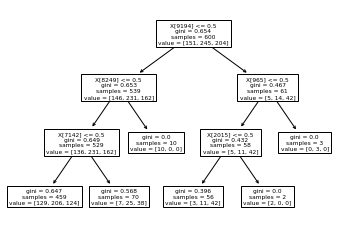

In [0]:
tree.plot_tree(clf) 

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, class_names=str(y_valid_enc), filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

Undersampling Test:



In [0]:
pip install imblearn

In [47]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_valid_enc, y_valid_enc)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
 from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=200) #au bout d'un moment augmenter max_depth ne change plus grand chose
clf = clf.fit(X_resampled, y_resampled)
prediction_dec_tree = clf.predict(X_resampled)

In [50]:
print(y_resampled.shape)
y_valid_enc.shape

(480,)


(600,)

In [54]:
precision, recall, fscore, support = precision_recall_fscore_support(y_resampled, prediction_dec_tree, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

* P: 1.0
* R: 1.0
* F: 1.0


# Week 7: Naive Bayes



The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).


In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_enc, y_train_enc)

clf1 = MultinomialNB()
clf1.fit(X_train_enc_nor, y_train_enc)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
prediction_nb= clf.predict(X_valid_enc)
prediction_nb_nor= clf1.predict(X_valid_enc_nor)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from joblib import load

print("The result with the original dataset is:")
precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, prediction_nb, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

print("The result with the normalized dataset is:")
precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, prediction_nb_nor, average='weighted')
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

The result with the original dataset is:
* P: 0.5778411890724677
* R: 0.58
* F: 0.5787159968754007
The result with the normalized dataset is:
* P: 0.5727652871941035
* R: 0.575
* F: 0.5734807086381933
